In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Fixing Regions
base = pd.read_csv("Intersecting_clean.csv")
regions = pd.read_csv("REGION.csv")
_reg = {}
for idx,row in regions.iterrows():
    _reg[row["name"]] = row["region"]
for idx,row in base.iterrows():
    _c = row["Country"]
    if _c in _reg:
        base.loc[idx,"Region"] = _reg[_c]
    else:
        print("Not Found: ",_c)
#Drop all countrys
base.drop(columns="Country",inplace=True)


0.622983311758297 1
0.666182386187741 2
0.7267930897900708 3
0.7397918951786593 9
0.7526569140687975 12
0.754167576101768 18
0.7628772834015746 28
0.7645207180289292 65
0.7677333667743382 73
0.7951745912600574 119
['Affordability']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.7951745912600574
   MSE: 0.22198807306023016
   Iters: 2500
   LRate: 0.01



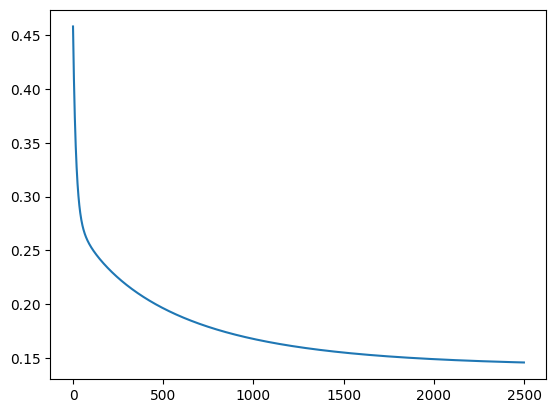

In [6]:
from MultiLinearReg import MultiLinear
rarr = None
val = 0
for n in range(200):
    try:
        mlr = MultiLinear(base,"Z")
        mlr.target=["Affordability"]
        mlr.features=[
        'gini',
        'exports',
        'imports',
        'pop',
        'gdppc',
        'Region',
        'median']
        res = mlr.create_model(n, 0.6)
        if n==0:
            rarr = res
        if res.r2>rarr.r2:
            print(res.r2, n)
            rarr = res
            val = n
    except:
        continue
sns.lineplot(rarr.Jhist)
print(rarr)


['Affordability']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.7951745912600574
   MSE: 0.22198807306023016
   Iters: 2500
   LRate: 0.01

['const', 'gini', 'exports', 'imports', 'pop', 'gdppc', 'median', 'Region_Africa', 'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania']


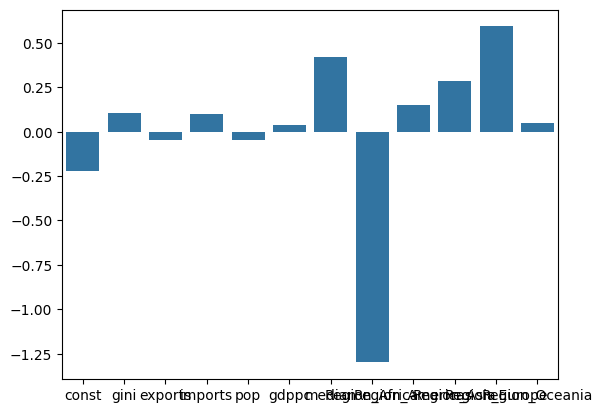

In [7]:
print(rarr)
sns.barplot(x=["const"]+rarr.fl,y=rarr.b.T.tolist()[-1])
print(['const']+rarr.fl)